## Carga de datos y preparación del espacio de trabajo.

In [22]:
# Preparamos el espacio de trabajo
# setwd('/Users/agus/Downloads/mdbd-master-3/proyecto_final')
setwd('C:/Users/ealcober/git/mdbd/mdbd/proyecto_final')
# para trabajar con ficheros excel
if(!require("XLConnect"))install.packages("XLConnect") 
library(XLConnect)

# dep 1
if(!require("dplyr"))install.packages("dplyr") 
library(dplyr)

# dep 2
if(!require("ggplot2"))install.packages("ggplot2") 
library(ggplot2)

if(!require("caTools"))install.packages("caTools", repos = "http://cran.us.r-project.org")
library(caTools)

# dep 3
if(!require("RColorBrewer"))install.packages("RColorBrewer") 
library(RColorBrewer)

# Función para eliminar fila por índice
removeRowByIndex <- function(x, row_index) {
  nr <- nrow(x)
  if (nr < row_index) {
    print('row_index exceeds number of rows')
  } else if (row_index == 1)
  {
    return(x[2:nr, ])
  } else if (row_index == nr) {
    return(x[1:(nr - 1), ])
  } else {
    return (x[c(1:(row_index - 1), (row_index + 1):nr), ])
  }
}

# Funcion que convierte a 0's los NAs
haz.cero.na=function(x){
  ifelse(is.na(x),0,x)}

# Nuestra hipótesis inicial:
## Queremos encontrar, si existe, una relación entre el nivel educativo de la población y el nivel de uso de plástico y su gestión.

# Comenzamos exponiendo brevemente unas cifras que ilustra la Producción de plástico global en Toneladas

,Year,Global.plastics.production..million.tonnes...tonnes.
61,2010,313000000
62,2011,325000000
63,2012,338000000
64,2013,352000000
65,2014,367000000
66,2015,381000000


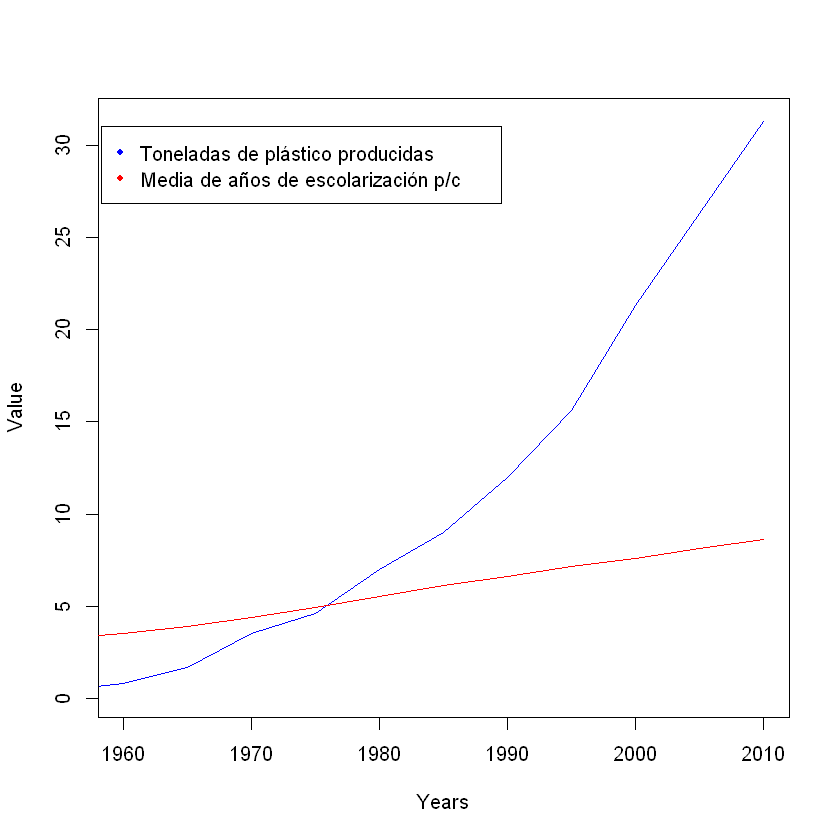

In [23]:

gpp<-read.csv('sources/global-plastics-production.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)
sch<-read.csv('sources/mean-years-of-schooling-selected-countries.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE)
pFate<-read.csv('sources/global-plastic-fate.csv',header=TRUE,sep="," , quote="\"",dec=".",fill=TRUE,na.strings="0", as.is=T)


gpp$Entity <- NULL
gpp$Code <- NULL

# tabla
tail(gpp)
#Produccion de plastico global 
colnames(gpp) <- c("Year", "Prod de plastico global")

schmean<-aggregate.data.frame(sch$Total_YearsSchool.â...Lee.Lee..2016...years. ,list(sch$Year), FUN=mean)
colnames(schmean) <- c("Year", "mean escolarizados")
prueba <- merge(gpp, schmean, by.y="Year", sort = TRUE)
prueba$`Prod de plastico global` <- prueba$`Prod de plastico global` / 10000000

plot(prueba$Year,prueba$`Prod de plastico global`,type="l",col="blue", 
     xlim=c(1960,2010), xlab="Years", ylab="Value")
lines(prueba$Year,prueba$`mean escolarizados`,col="red")



legend("bottomleft", legend=c("Toneladas de plástico producidas", "Media de años de escolarización p/c"),
      col=c("blue", "red"),
      pch=c(20,20),
       inset=c(0.005,0.83)
      )


# vamos a buscar una relación entre ambas variables

Year,Prod de plastico global,mean escolarizados
1950,0.2,3.026036
1955,0.4,3.253243
1960,0.8,3.516486
1965,1.7,3.878198
1970,3.5,4.411892
1975,4.6,4.949279
1980,7.0,5.547838
1985,9.0,6.095315
1990,12.0,6.636126
1995,15.6,7.155495


[1] "Year" "x"    "y"

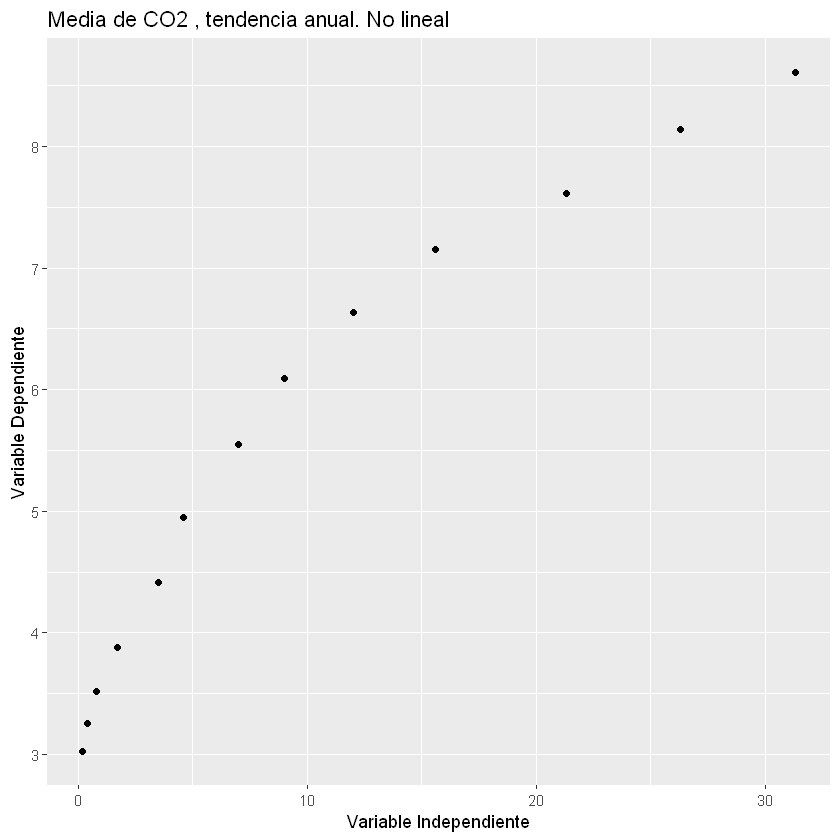

In [24]:
library(ggplot2)
prueba <- merge(gpp, schmean, by.y="Year", sort = TRUE)
prueba$`Prod de plastico global` <- prueba$'Prod de plastico global' / 10000000

prueba
colnames(prueba) <- c('Year', 'x', 'y')
colnames(prueba)
ggplot() + geom_point(data = prueba, aes(x = prueba$x, y = prueba$y)) + 
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Media de CO2 , tendencia anual. No lineal")

In [25]:
split = sample.split(prueba$y, SplitRatio = 0.7)
nltrain = subset(prueba, split == TRUE)
nltest = subset(prueba, split == FALSE)

In [26]:
nltrain$x2 <- nltrain$x^2
str(nltrain)

'data.frame':	9 obs. of  4 variables:
 $ Year: int  1955 1960 1965 1970 1975 1985 1990 1995 2000
 $ x   : num  0.4 0.8 1.7 3.5 4.6 9 12 15.6 21.3
 $ y   : num  3.25 3.52 3.88 4.41 4.95 ...
 $ x2  : num  0.16 0.64 2.89 12.25 21.16 ...


In [27]:
set.seed(1234)
regresion_poly <- lm(nltrain$y ~ nltrain$x + x2, data = nltrain)

In [28]:
summary(regresion_poly)


Call:
lm(formula = nltrain$y ~ nltrain$x + x2, data = nltrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08573 -0.06112  0.02112  0.04127  0.11467 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.1796350  0.0488653   65.07 8.86e-10 ***
nltrain$x    0.4020113  0.0133547   30.10 8.92e-08 ***
x2          -0.0091814  0.0006353  -14.45 6.88e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07678 on 6 degrees of freedom
Multiple R-squared:  0.9984,	Adjusted R-squared:  0.9978 
F-statistic:  1822 on 2 and 6 DF,  p-value: 4.445e-09


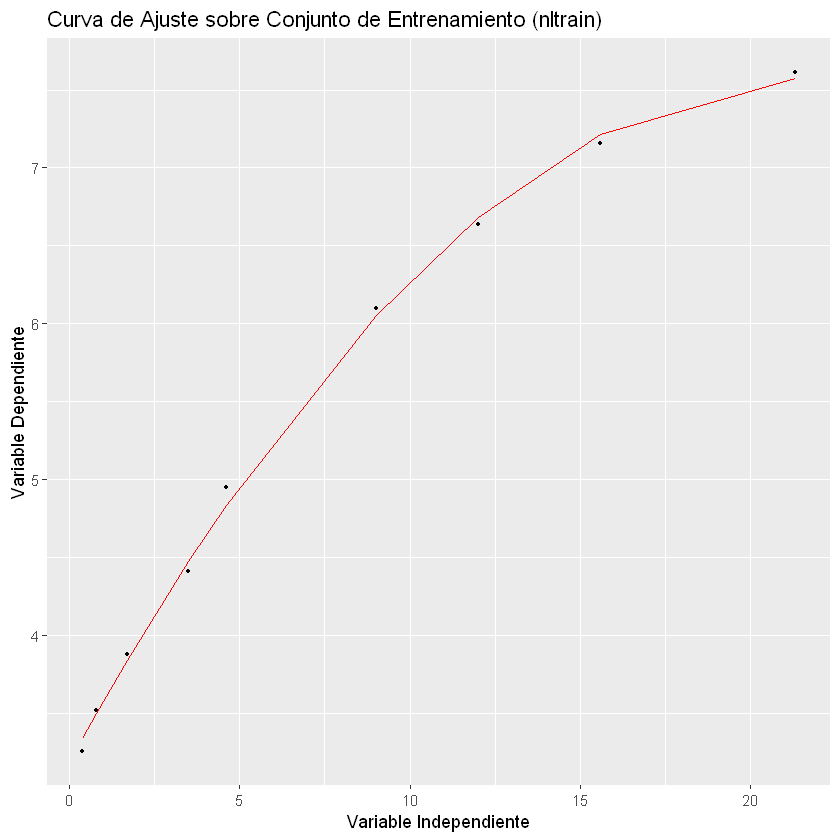

In [29]:
y_poly_predict <- predict(regresion_poly, nltrain)
ggplot() + geom_point(data = nltrain, aes(x = nltrain$x, y = nltrain$y), size = 0.7) + 
  geom_line(aes( x = nltrain$x, y = y_poly_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Entrenamiento (nltrain)")

In [30]:
nltrain$x3 <- nltrain$x^3
regresion_poly <- lm(nltrain$y ~ nltrain$x + x2 + x3, data = nltrain)
summary(regresion_poly)


Call:
lm(formula = nltrain$y ~ nltrain$x + x2 + x3, data = nltrain)

Residuals:
         2          3          4          5          6          8          9 
-4.255e-02  4.741e-02  3.653e-02 -1.060e-01  6.102e-02  1.804e-02 -1.946e-02 
        10         11 
 5.123e-03 -5.797e-05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.1176909  0.0533159  58.476 2.77e-08 ***
nltrain$x    0.4513642  0.0291093  15.506 2.03e-05 ***
x2          -0.0153189  0.0033793  -4.533  0.00621 ** 
x3           0.0001895  0.0001030   1.840  0.12521    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06495 on 5 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9984 
F-statistic:  1698 on 3 and 5 DF,  p-value: 6.131e-08


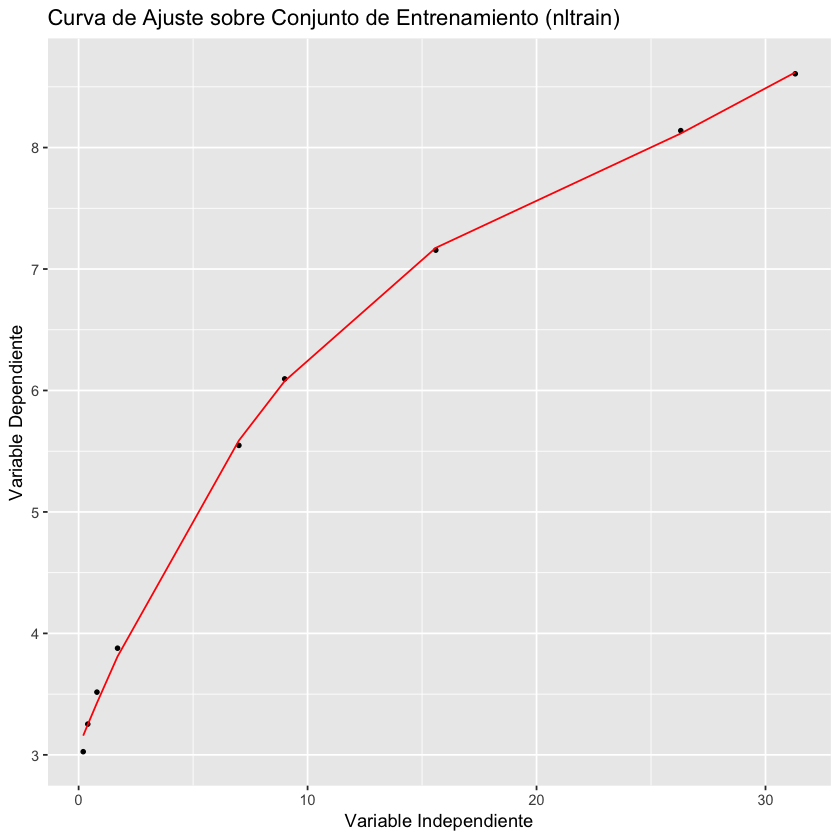

In [57]:
y_poly_predict <- predict(regresion_poly, nltrain)
ggplot() + 
geom_point(data = nltrain, aes(x = nltrain$x, y = nltrain$y), size = 0.9) + 
geom_line(aes( x = nltrain$x, y = y_poly_predict), color = "red") +
  xlab("Variable Independiente") + 
  ylab("Variable Dependiente") + 
  ggtitle("Curva de Ajuste sobre Conjunto de Entrenamiento (nltrain)")

In [34]:
nltest
x<-40
pred<-  3.1176909 + 0.4513642*x - 0.0153189 *x^2 + 0.0001895*x^3
pred


,Year,x,y
1,1950,0.2,3.026036
7,1980,7.0,5.547838
12,2005,26.3,8.139279
13,2010,31.3,8.607477


[1] 8.790019